#ESSAI


No 1.

Bias adalah kondisi ketika hasil prediksi yang dihasilkan oleh model memiliki perbedaan nilai dengan hasil yang terdapat pada training set. Apabila pada training dataset saja hasilnya sudah jelek, apalagi pada testing dataset sudah pasti hasilnya jelek juga. Oleh karena itu apabila terdapat bias pada model kita, dapat dikatakan bahwa model kita underfit.

Variance adalah kondisi ketika data yang kita miliki memiliki variasi nilai yang beragam hal ini menyebabkan masing-masing nilai memiliki jarak yang cukup signifikan terhadap mean atau rata-rata dari keseluruhan data. Dengan variasi nilai yang beragam, algoritma machine learning akan menyesuaikan agar model dapat fit atau cocok dengan data training yang diberikan. Hal ini memungkinkan model untuk memiliki akurasi yang baik pada training dataset. Akan tetapi, pada testing dataset model akan kurang dapat memprediksi dengan baik. Hal ini dikarenakan model terlalu menyesuaikan dengan training dataset, sehingga apabila terdapat variasi data baru pada testing dataset, maka model tidak dapat menyesuaikan variasi data baru tersebut.

Model yang memiliki nilai bias serta variansi dataset yang sedikit adalah model yang memiliki hasil prediksi paling baik. (tidak underfit dan overfit).

No 2.

Beberapa metode untuk menentukan jumah k yang paling optimal untuk model K-Means adalah dengan memperhatikan nilai inertia dari model K-Means per jumlah k yang digunakan. Semakin kecil nilai inertia dan semakin sedikit jumlah cluster artinya semakin baik hasil dari model K-Means.

Pada grafik tabel inertia dan jumlah cluster, semakin pojok kiri bawah (inertia kecil dan cluster sedikit) maka itulah jumlah cluster yang paling baik untuk model K-Means. Langkah lainnya juga adalah dengan mengkalikan jumlah cluster dengan hasil inertia dari masing-masing cluster dan mengambil hasil perkalian yang paling kecil.

Ada beberapa cluster yang harus dihindari pada model K-Means yaitu jumlah cluster 1 (semua data dikumpulkan pada 1 cluster) dan cluter sejumlah n data (masing-masing data menjadi cluster sendiri).  

#KASUS

In [ ]:
#library import

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/Dataset_Classification.csv')

In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,2.423807,0.833363,-0.932956,2.047133,0.089361,-1.062281,2.080691,0.412019,-1.244573,3
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.783508,-0.877666,0.084089,-0.718668,-0.965767,-0.567989,-0.911335,-0.415529,0.167377,3
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,-0.783508,-0.851601,-0.481456,0.041508,-0.623651,-1.062281,-0.911335,1.288949,-1.201469,0
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,1.228601,0.089344,-0.932956,1.093751,0.017282,-0.920086,1.336901,0.012367,-0.990998,3
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.783508,0.902548,0.000080,-1.049062,1.518648,1.607938,-0.911335,-0.824106,0.663292,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,1.002441,-0.896533,-1.285932,-0.340636,-0.781463,-0.456489,-1.076878,-1.048795,2.646339,1.079958,...,-0.783508,-0.585731,-0.932956,-1.049062,2.853257,0.959695,-0.911335,-1.265504,-0.580624,0
3260,0.945720,-0.896533,-1.285932,2.827260,-0.781463,-0.934908,3.962439,-0.579800,-0.929289,0.351375,...,-0.783508,-0.877666,4.197867,-0.848842,-0.965767,0.381298,-0.911335,-1.265504,2.465586,0
3261,-0.808017,1.000596,1.102773,-0.968603,-0.781463,-0.934908,0.153923,0.701907,-0.863490,-0.698799,...,-0.783508,-0.877666,-0.102518,0.766219,-0.845014,-0.730420,0.968899,1.004706,-0.887151,2
3262,1.516406,-0.896533,-1.285932,0.384489,-0.106088,0.918343,0.518946,-1.048795,-0.487394,1.597113,...,-0.007016,1.018655,0.433785,-1.049062,-0.137452,1.531363,-0.911335,-1.265504,0.524161,0


**DATA VISUALIZING**

penjelasan data visualisasi:

berdasarkan data yang sudah dilihat, data terdiri atas 257 kolom dengan 3264 baris. Data yang cenderung banyak ini tentu tidak dapat digunakan semua, karena apabila semua data tersebut digunakan maka akan sangat lama sekali model kita untuk bisa fit seluruh data tersebut.

Visualisasi yang dilakukan adalah dengan melihat apakah data kelas pada label ada yang jomplang atau tidak dan melihat 10 kolom dengan korelasi terbesar dengan kolom label.

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,2.423807,0.833363,-0.932956,2.047133,0.089361,-1.062281,2.080691,0.412019,-1.244573,3
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.783508,-0.877666,0.084089,-0.718668,-0.965767,-0.567989,-0.911335,-0.415529,0.167377,3
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,-0.783508,-0.851601,-0.481456,0.041508,-0.623651,-1.062281,-0.911335,1.288949,-1.201469,0
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,1.228601,0.089344,-0.932956,1.093751,0.017282,-0.920086,1.336901,0.012367,-0.990998,3
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.783508,0.902548,0.000080,-1.049062,1.518648,1.607938,-0.911335,-0.824106,0.663292,0


In [ ]:
df.describe()

#melihat data statistik dari data yang sudah diperoleh

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,...,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,-0.108383,0.109415,0.012731,-0.038641,0.025888,-0.055990,-0.071048,0.110057,-0.039071,-0.110402,...,0.042286,-0.069302,-0.075941,0.111274,-0.063311,-0.115492,0.081308,-0.005758,-0.023017,1.421569
std,0.918837,1.056640,0.940577,1.073387,1.036104,0.916824,0.998030,1.013487,0.812572,0.939323,...,1.024120,0.869944,1.014345,1.007270,0.831845,0.932384,1.056331,0.939202,1.032806,1.167798
min,-1.032690,-0.896533,-1.285932,-1.214555,-0.781463,-0.934908,-1.076878,-1.048795,-0.929289,-1.039528,...,-0.783508,-0.877666,-0.932956,-1.049062,-0.965767,-1.062281,-0.911335,-1.265504,-1.244573,0.000000
25%,-1.032690,-0.896533,-0.700087,-1.015734,-0.781463,-0.934908,-0.816931,-1.048795,-0.919927,-1.039528,...,-0.783508,-0.877666,-0.863381,-1.049062,-0.844952,-1.062281,-0.911335,-0.739660,-0.935890,0.000000
50%,-0.332834,-0.207360,-0.011766,-0.083122,-0.574530,-0.283327,-0.335854,0.092542,-0.099581,-0.357419,...,-0.515200,-0.319091,-0.365065,0.117323,-0.129394,-0.342554,-0.254558,-0.041212,-0.068236,1.000000
75%,0.618180,0.932127,0.593603,0.545812,0.749548,0.585535,0.413233,0.937152,0.405588,0.588843,...,0.809147,0.504317,0.304781,0.930016,0.333070,0.598419,0.895811,0.575592,0.595699,3.000000
max,2.725864,3.223942,3.532661,5.231793,3.814274,4.790517,4.698876,2.758523,3.063246,2.773907,...,3.514284,4.699131,5.075081,2.698013,3.258275,2.714228,3.226129,3.476898,4.926381,3.000000


In [ ]:
data2 = df.isnull().sum()

for i in data2 :
  if i != 0 :
    print("There's a null value")

#tidak ada null value yang ditemukan

<Axes: xlabel='label', ylabel='count'>

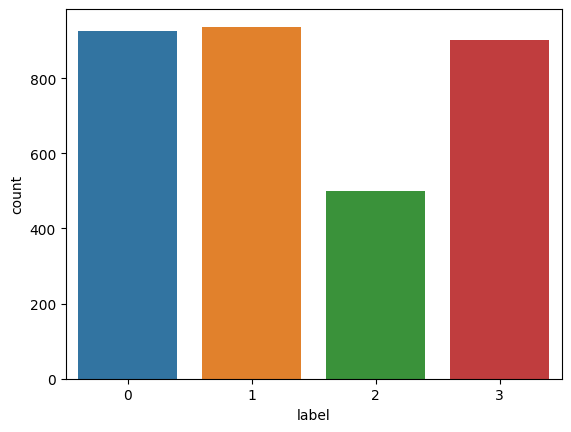

In [ ]:
sns.countplot(x = df['label'])

#diketahui dari tabel bahwa masing-masing label memiliki jumlah yang hampir mirip (tidak jomplang). Sehingga tidak diperlukan upsampling atau downsampling.

In [ ]:
#tabel korelasi
#tabel korelasi sulit untuk dimengerti sehingga akan diolah untuk diambil 10 kolom yang paling berkorelasi dengan kolom label.
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
x1,1.000000,-0.545532,-0.433324,0.644651,-0.507631,-0.047564,0.454684,-0.668736,0.122917,0.985674,...,-0.488533,-0.007917,0.446207,-0.663886,0.221514,0.987589,-0.536866,-0.458462,0.653042,-0.530133
x2,-0.545532,1.000000,0.338222,-0.596936,0.707684,0.402223,-0.477615,0.684517,0.108605,-0.501651,...,0.731567,0.330935,-0.493941,0.675722,0.009155,-0.498163,0.999336,0.345683,-0.580693,0.454776
x3,-0.433324,0.338222,1.000000,-0.265065,0.159310,0.143290,0.016778,0.400005,-0.194488,-0.425087,...,0.137759,0.152730,-0.011760,0.411098,-0.251001,-0.426059,0.333454,0.997210,-0.280121,0.138787
x4,0.644651,-0.596936,-0.265065,1.000000,-0.582152,-0.449370,0.786013,-0.535458,-0.242316,0.538962,...,-0.580158,-0.406811,0.812651,-0.540315,-0.181896,0.553205,-0.586898,-0.272648,0.993721,-0.421615
x5,-0.507631,0.707684,0.159310,-0.582152,1.000000,0.539255,-0.536912,0.484673,0.344095,-0.477567,...,0.992353,0.451582,-0.501524,0.453509,0.237070,-0.474871,0.707542,0.173906,-0.585894,0.513077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x253,0.987589,-0.498163,-0.426059,0.553205,-0.474871,-0.010310,0.351011,-0.624300,0.173179,0.998907,...,-0.450432,0.025424,0.329069,-0.616842,0.269905,1.000000,-0.491844,-0.456478,0.572608,-0.545265
x254,-0.536866,0.999336,0.333454,-0.586898,0.707542,0.409250,-0.467277,0.673051,0.105765,-0.495642,...,0.731207,0.338051,-0.481772,0.663818,0.006844,-0.491844,1.000000,0.341308,-0.571847,0.457142
x255,-0.458462,0.345683,0.997210,-0.272648,0.173906,0.151063,0.016890,0.405243,-0.198996,-0.455601,...,0.150034,0.159574,-0.005434,0.415056,-0.257303,-0.456478,0.341308,1.000000,-0.291629,0.163516
x256,0.653042,-0.580693,-0.280121,0.993721,-0.585894,-0.462304,0.765082,-0.516255,-0.251846,0.556862,...,-0.577927,-0.421164,0.780827,-0.519737,-0.191701,0.572608,-0.571847,-0.291629,1.000000,-0.442142


In [ ]:
#cek korelasi hanya yang kolom label ke setiap kolom lainnya, kemudian kita hanya untuk mengambil korelasi yang diatas 0.2
#kolom yang memiliki korelasi dibawah 0.2 akan dihiraukan. hal ini bertujuan untuk mengurangi jumlah data yang harus di periksa.
data = df.corr()
data3 = data['label'].drop('label')
data3 = data3[np.abs(data['label']) >= 0.2]
df2 = pd.DataFrame({'label':data3})

df2

,label
x1,-0.530133
x2,0.454776
x4,-0.421615
x5,0.513077
x6,0.230082
...,...
x248,0.497150
x251,0.303380
x253,-0.545265
x254,0.457142


In [ ]:
#kita mau mengecek 10 kolom dengan korelasi yang paling besar terhadap label (baik yang berkolerasi secara terbalik atau tidak (- or +))
df2_baru = df2.abs()
df2_baru = df2_baru.sort_values(by=['label'], ascending=False)
df2_baru.head(10)

,label
x76,0.579025
x184,0.575756
x148,0.570059
x229,0.565821
x121,0.562011
x118,0.551797
x10,0.547343
x22,0.546318
x253,0.545265
x28,0.543906


<Axes: >

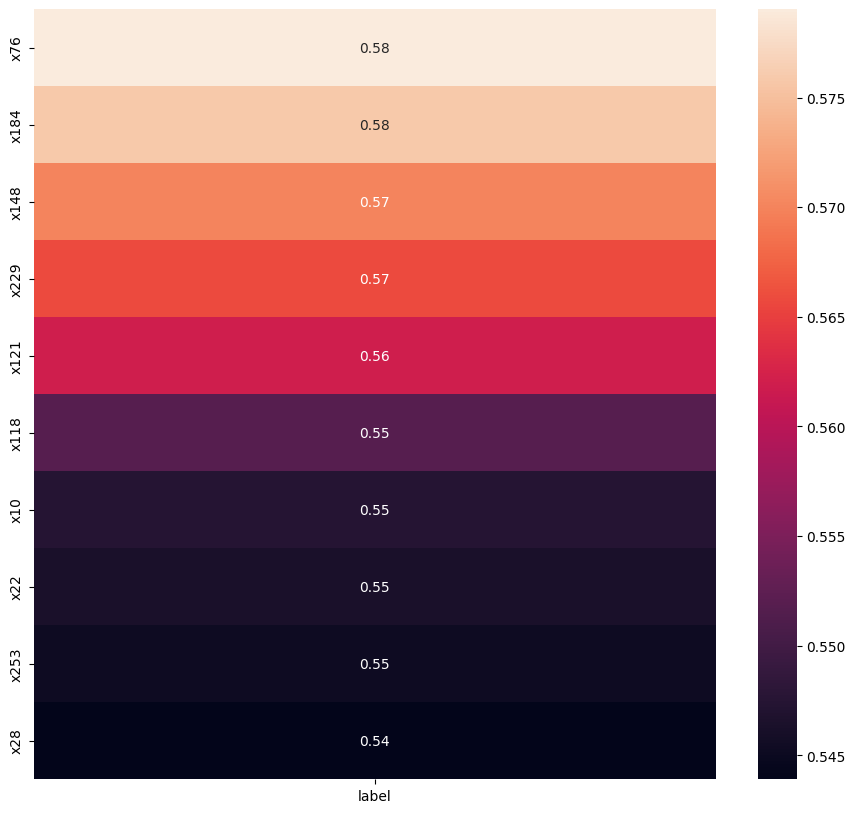

In [ ]:
#tabel yang disajikan dibawah menunjukan 10 kolom yang memiliki korelasi terbesar dengan kolom label.
plt.figure(figsize=(11,10))
sns.heatmap(df2_baru.head(10), annot = True)

**DATA PREPROCESSING**

Karena jumlah data yang banyak, maka preprocess yang saya putuskan untuk lakukan adalah dengan membuang semua data dengan korelasi yang dibawah 0.2 dan dengan melaksanakan PCA pada 140 kolom dengan korelasi tertinggi terhadap kolom label. PCA dilakukan per 20 kolom sehingga nantinya akan menghasil 7 kolom baru (7 kolom ini yang nantinya akan digunakan untuk variabel x pada training dan testing dataset).

Tujuan dari dilakukan PCA adalah untuk mengurangin jumlah kolom yang akan di training oleh model klasifikasi tanpa mengurangi secara banyak informasi yang dari kolom-kolom yang digabungkan.

In [ ]:
#function yang digunakan untuk melaksanakan PCA
def buatPCA(data, x):
  datatemp = df[data].values

  pca = PCA(n_components=1)

  datahasil = pca.fit_transform(datatemp)

  df['PCA'+ str(x)] = datahasil

In [ ]:
#apa tujuan dari code dibawah ini? tujuan dari code dibawah ini adalah untuk memperform PCA dari 140 kolom dengan korelasi terbesar.
# PCA akan dilakukan per 20 kolom, sehingga nantinya akan menghasil 7 kolom.
jumlahPCA = 0
temp = []

counter = 0
iterasi = 0

for i in df2_baru.index:
  temp.append(i)
  counter = counter + 1
  iterasi = iterasi + 1

  if counter == 20 :
    buatPCA(temp, jumlahPCA)
    temp = []
    counter = 0;
    jumlahPCA = jumlahPCA + 1

  if iterasi == 140:
    break;


In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x255,x256,label,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,0.412019,-1.244573,3,-4.852817,-5.297412,10.085890,9.164503,8.283116,-5.929960,9.016339
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.415529,0.167377,3,-1.641504,-0.960725,-3.210144,-3.824281,-3.961440,1.405020,-3.614955
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,1.288949,-1.201469,0,-4.395979,-2.978130,-2.757141,-3.401626,-3.111371,-2.545865,-0.446529
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,0.012367,-0.990998,3,-3.867933,-4.139896,4.929911,5.125235,5.469670,-4.656030,4.166389
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.824106,0.663292,0,6.517033,6.669305,-3.680904,-4.038717,-4.298769,3.510686,-5.087389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,1.002441,-0.896533,-1.285932,-0.340636,-0.781463,-0.456489,-1.076878,-1.048795,2.646339,1.079958,...,-1.265504,-0.580624,0,2.847610,4.314426,-3.093923,-3.170059,-3.534880,0.454955,-5.087389
3260,0.945720,-0.896533,-1.285932,2.827260,-0.781463,-0.934908,3.962439,-0.579800,-0.929289,0.351375,...,-1.265504,2.465586,0,2.578215,4.293106,-4.032515,-4.449589,-5.498013,11.053454,-3.155154
3261,-0.808017,1.000596,1.102773,-0.968603,-0.781463,-0.934908,0.153923,0.701907,-0.863490,-0.698799,...,1.004706,-0.887151,2,-2.708648,-2.134325,-2.892549,1.241725,4.182628,-3.876510,2.715118
3262,1.516406,-0.896533,-1.285932,0.384489,-0.106088,0.918343,0.518946,-1.048795,-0.487394,1.597113,...,-1.265504,0.524161,0,6.321241,5.964666,-0.793627,-2.709488,-4.190867,2.630707,-5.087389


In [ ]:
#tarik semua data PCA kedalam sebuah dataframe final
listitem = []
for i in range(7):
  listitem.append('PCA'+ str(i))

df_final = df[listitem]
df_final['label'] = df['label'].values

<ipython-input-474-e3c2257c4e5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['label'] = df['label'].values


<Axes: >

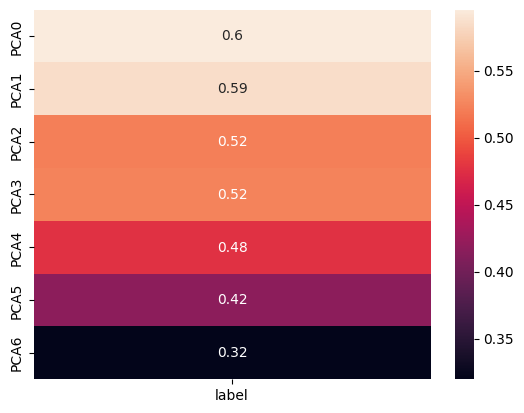

In [ ]:
#data dibawah adalah tabel korelasi antara semua kolom hasil PCA terhadap kolom label
df_final_corr = df_final.corr()
df_final_corr= np.abs(df_final_corr['label']).drop('label')

pd_temp = pd.DataFrame({'label': df_final_corr})

sns.heatmap(pd_temp, annot=True)

In [ ]:
#kolom label di drop kembali karena kolom label hanya saya gunakan untuk visualisasi kolom korelasi saja
df_final = df_final.drop('label', axis = 1)

**DATA SPLITTING AND SCALING**

In [ ]:
xFinal = df_final.values
yFinal = df['label'].values

In [ ]:
#data dibagi menjadi train dan test dimana porsi data testing adalah sebesar 0.2 atau 20%
x_train, x_test, y_train, y_test = train_test_split(xFinal, yFinal, test_size = 0.2, random_state = 42)

In [ ]:
#lakukan standard scaler untuk mengubah skala data agar semua data memiliki skala yang sama
#standard scaler dilakukan pada semua data x, yang difit hanya data train saja, yang data test hanya ditransform.
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**MODEL LOGISTIC REGRESSION**

Kedua model yang saya gunakan untuk klasifikasi adalah model logistic regression dan model K Nearest Neighbor. Logistic regression saya gunakan karena model klasifikasi ini relatif simpel. Sedangkan, model KNN saya gunakan karena terdapat beberapa kolom yang dapat dijadikan nearest neighbor.

In [ ]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [ ]:
akurasilogreg = accuracy_score(y_pred, y_test)

print(akurasilogreg)

0.6079632465543645


In [ ]:
#hasil evaluasi recall presisi dan f-1 score dibantu dengan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       168
           1       0.59      0.49      0.53       205
           2       0.38      0.39      0.39        97
           3       0.75      0.78      0.77       183

    accuracy                           0.61       653
   macro avg       0.58      0.59      0.58       653
weighted avg       0.61      0.61      0.60       653



In [ ]:
#we're using recall cause we can't false predict a tumor patient

**MODEL K NEAREST NEIGHBOR**

In [ ]:
#hyperparameter tuning dilakukan pada model KNN untuk menentukan parameter mana yang paling baik untuk digunakan pada model ini.

parameter = {
    'n_neighbors' : [2,3,4,5],
    'weights' : ['uniform', 'distance']
}

model2 = KNeighborsClassifier()

tuning = GridSearchCV(estimator = model2, param_grid = parameter, cv = 3)

In [ ]:
tuning.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [ ]:
#dari data dibawah ini diketahui bahwa parameter terbaik dari semua kemungkinan parameter adalah 5 neighbor dan weightnya distance
print(tuning.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
#buat model KNN dengan parameter terbaik dari hyperparameter tuning

model2 = KNeighborsClassifier(n_neighbors=5, weights='distance')

model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

In [ ]:
print(accuracy_score(y_pred2, y_test))

0.7075038284839203


In [ ]:
#hasil evaluasi recall presisi dan f-1 score dibantu dengan classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       168
           1       0.70      0.61      0.65       205
           2       0.68      0.72      0.70        97
           3       0.80      0.85      0.82       183

    accuracy                           0.71       653
   macro avg       0.70      0.71      0.71       653
weighted avg       0.71      0.71      0.71       653



**EVALUATION**

Dari kedua model yang saya gunakan, model K Nearest Neighbor memiliki recall yang lebih baik ketimbang model logistic regression. Metrics yang lebih dihighlight pada kasus ini adalah recall. kenapa recall? karena rumus dari perhitungan recall adalah TP/(TP+FN) dimana semakin baik hasil dari recall maka semakin sedikit tebakan salah pada pasien yang positif.

Recall lebih penting dari pada presisi pada kasus ini karena pasien yang terkena positif tumor tidak boleh sampai salah diprediksi negatif karena dapat berakibat fatal. Sebaliknya pasien yang negatif tapi diprediksi positif juga tidak baik akan tetapi tidak sefatal pasien yang positif tapi diprediksi negatif. Berdasarkan hal ini, recall lebih dihighlight sebagai metrics evaluasi kedua model.

Perbandingan nilai recall dari kedua model:

Model Logistic Regression 3 persen lebih baik dalam memprediksi label dengan kelas 0. Tetapi, model KNN lebih baik dalam memprediksi ketiga kelas lainnya.